## Persiapan

In [403]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [404]:
#import dataset
df_2022=pd.read_csv('C:\\Users\\User\\Downloads\\Data-20240503T102819Z-001\\Data\\2022.csv')

df_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [405]:
df_2022.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

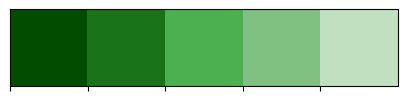

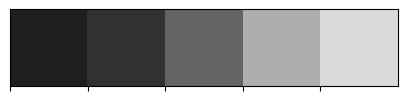

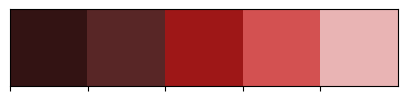

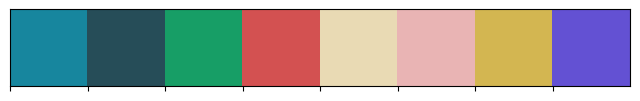

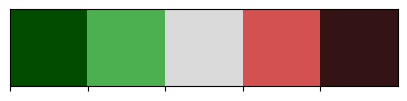

In [407]:
# Membuat Color pallete untuk mempercantik tampilan
colors_green = ["#004D00", "#197419", '#4CAF50', '#80C080', '#C0E0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#004D00", '#4CAF50', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_green)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [408]:
# drop Country tanpa Happiness Score
df_2022 = df_2022.dropna()

In [409]:
df_2022.columns.tolist()

['RANK',
 'Country',
 'Happiness score',
 'Whisker-high',
 'Whisker-low',
 'Dystopia (1.83) + residual',
 'Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']

In [410]:
# mendapatkan kolom `object`
obj_col = df_2022.select_dtypes(include=['O']).columns

# Mendapatkan semua kolom kecuali 'RANK' dan 'Country'
columns = [col for col in obj_col if col not in ['RANK', 'Country']]

# Convert kolom numeric yang awalnya `object` menjadi `float`
for col in columns:
    df_2022[col] = df_2022[col].str.replace(',', '.').astype(float)

In [411]:
## Indonesia Ranking Berapa?
df_2022.loc[df_2022["Country"]=='Indonesia']

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
86,87,Indonesia,5.24,5.341,5.139,1.3,1.382,0.883,0.539,0.62,0.468,0.047


In [412]:
## Secara Urutan ada di percentile berapa?
total_country = df_2022.shape[0]
rank_indo = df_2022.loc[df_2022["Country"]=='Indonesia', 'RANK'].values[0]

print(rank_indo / total_country)

0.5958904109589042


In [413]:
#Melihat 4 Negara dengan Tingkat Kejahatan Tertinggi di Dunia
# Brazil Ranking Berapa?
brazil_ranking = df_2022.loc[df_2022["Country"] == "Brazil", "Happiness score"].idxmax()
print(brazil_ranking)

# El Savador Rangking Berapa?
el_salvador_ranking = df_2022.loc[df_2022["Country"] == "El Salvador", "Happiness score"].idxmax()
print(el_salvador_ranking)

# Honduras Rangking Berapa?
honduras_ranking = df_2022.loc[df_2022["Country"] == "Honduras", "Happiness score"].idxmax()
print(honduras_ranking)

# Jamaica Rangking Berapa?
jamaica_ranking = df_2022.loc[df_2022["Country"] == "Jamaica", "Happiness score"].idxmax()
print(jamaica_ranking)

37
48
54
62


In [414]:
# Memfilter DataFrame df untuk hanya memasukkan data dari 10 Negara dengan Tingkat Kejahatan Tertinggi di Dunia

Highest_crime_country = ['Venezuela', 'Papua New Guinea','South Africa',
                    'Afghanistan','Honduras','Trinidad and Tobago', 'Guyana', 
                    'El Salvador','Jamaica', 'Brazil']

Highest_crime_country_df = df_2022.loc[df_2022['Country'].isin(Highest_crime_country)]

In [415]:
set(Highest_crime_country) - set(Highest_crime_country_df.Country)

{'Guyana', 'Papua New Guinea', 'Trinidad and Tobago'}

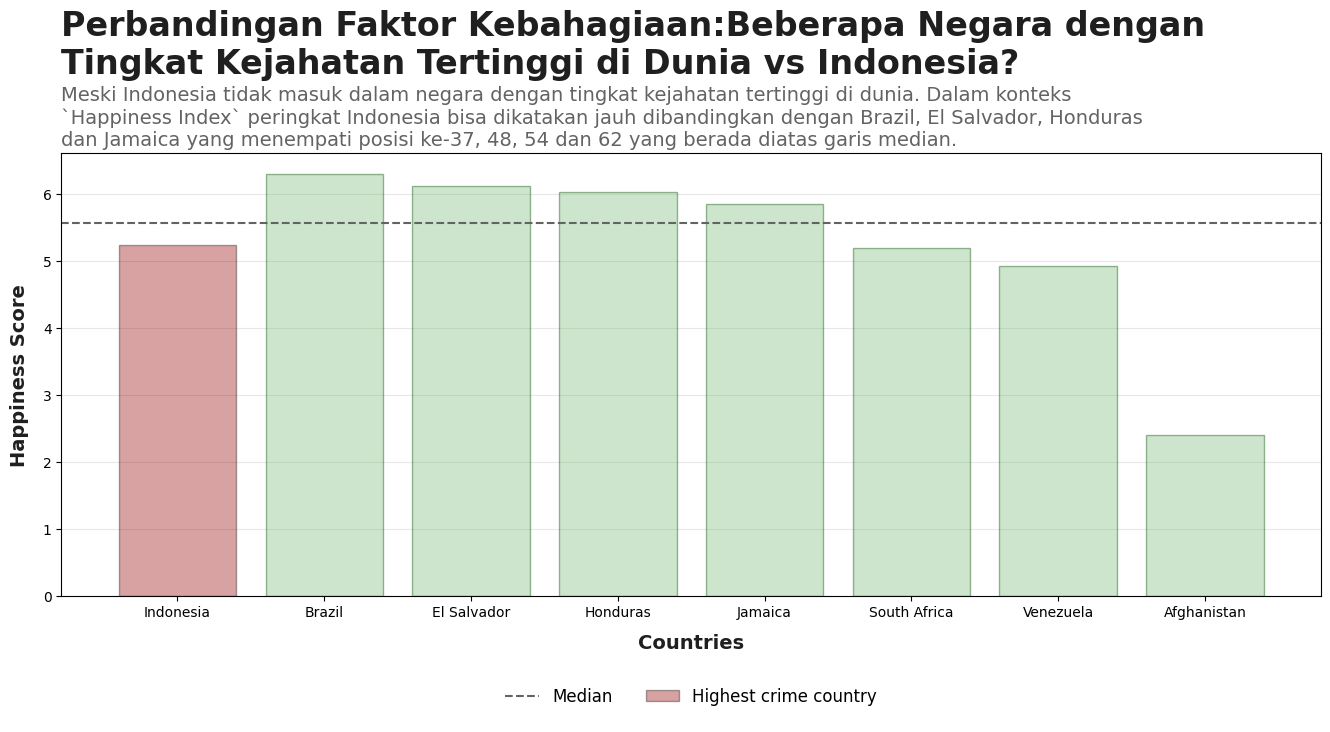

In [418]:
# Filter DataFrame df_2022 untuk hanya menyertakan Tingkat Kejahatan Tertinggi di Dunia
df = df_2022[df_2022['Country'].isin(Highest_crime_country)]

# Mengambil baris ke 87 dari generousity_df yang mungkin merepresentasikan negara Indonesia
df_2022_middle = df_2022.iloc[+86]

# Menghitung skor kebahagiaan median dari df_2022
median_score = df_2022['Happiness score'].median()

# Membuat figur dan sumbu untuk plot dengan ukuran tertentu
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk negara Indonesia
bars0 = ax.bar(df_2022_middle['Country'], df_2022_middle['Happiness score'], color=colors_red[2], alpha=0.4, edgecolor=colors_dark[0])

# Membuat grafik bar untuk Tingkat Kejahatan Tertinggi di Dunia
bars1 = ax.bar(df['Country'], df['Happiness score'], color=(colors_green)[3], alpha=0.4, edgecolor=(colors_green)[0])

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_dark[2])

# Menambahkan legenda untuk grafik
ax.legend(["Median", "Highest crime country"], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, borderpad=1, frameon=False, fontsize=12)

# Menambahkan grid pada sumbu y dan mengatur agar grid berada di belakang bar
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Mengatur label dan gaya untuk sumbu x dan y
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks pada grafik untuk memberikan konteks atau informasi tambahan
plt.text(s="Perbandingan Faktor Kebahagiaan:Beberapa Negara dengan\nTingkat Kejahatan Tertinggi di Dunia vs Indonesia?", ha='left', x=xmin, y=ymax*1.18, fontsize=24, fontweight='bold', color=colors_dark[0])

# Menambahkan judul dengan informasi posisi Indonesia dalam konteks ASEAN dan global
plt.title(f"Meski Indonesia tidak masuk dalam negara dengan tingkat kejahatan tertinggi di dunia. Dalam konteks\n`Happiness Index` peringkat Indonesia bisa dikatakan jauh dibandingkan dengan Brazil, El Salvador, Honduras\ndan Jamaica yang menempati posisi ke-{brazil_ranking}, {el_salvador_ranking}, {honduras_ranking} dan {jamaica_ranking} yang berada diatas garis median.", loc='left', fontsize=14, color=colors_dark[2])

# Mengatur layout agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

In [419]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [420]:
# Filter rows for Brazil and Indonesia
countries = ['Brazil', 'Indonesia']
df_plot = df_2022[df_2022['Country'].isin(countries)]
for i , r in df_plot.iterrows():
  print(r)

RANK                                              38
Country                                       Brazil
Happiness score                                6.293
Whisker-high                                   6.384
Whisker-low                                    6.202
Dystopia (1.83) + residual                     2.361
Explained by: GDP per capita                   1.462
Explained by: Social support                   1.044
Explained by: Healthy life expectancy          0.615
Explained by: Freedom to make life choices     0.546
Explained by: Generosity                       0.131
Explained by: Perceptions of corruption        0.134
Name: 37, dtype: object
RANK                                                 87
Country                                       Indonesia
Happiness score                                    5.24
Whisker-high                                      5.341
Whisker-low                                       5.139
Dystopia (1.83) + residual                          1.3
Expl

## Modifikasi

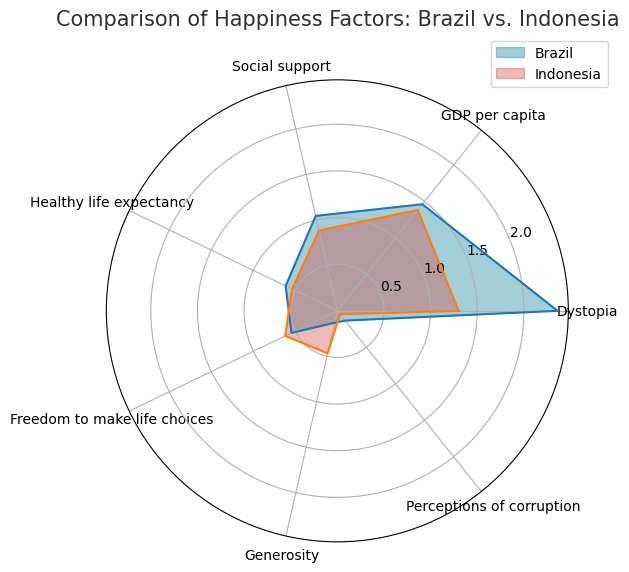

In [421]:
# Filter rows for Brazil and Indonesia
countries = ['Brazil', 'Indonesia']
df_plot = df_2022[df_2022['Country'].isin(countries)]

# Columns to include in the radar chart
columns = ['Dystopia (1.83) + residual', 'Explained by: GDP per capita',
           'Explained by: Social support', 'Explained by: Healthy life expectancy',
           'Explained by: Freedom to make life choices',
           'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Number of variables we're plotting.
num_vars = len(columns)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop by appending the first angle at the end.

# Draw the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for k, (idx, row) in enumerate(df_plot.iterrows()):
    data = row[columns].tolist() + row[columns].tolist()[:1]  # Complete the loop
    ax.fill(angles, data, alpha=0.4, label=row['Country'], color=colors_mix[3*k], edgecolor=colors_mix[3*k])
    ax.plot(angles, data)

# Labels for each point
ax.set_xticks(angles[:-1])
col_name = ['Dystopia', 'GDP per capita',
           'Social support', 'Healthy life expectancy',
           'Freedom to make life choices',
           'Generosity', 'Perceptions of corruption']
ax.set_xticklabels(col_name)

# Title and legend
plt.title('Comparison of Happiness Factors: Brazil vs. Indonesia', size=15, color=colors_dark[1], y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

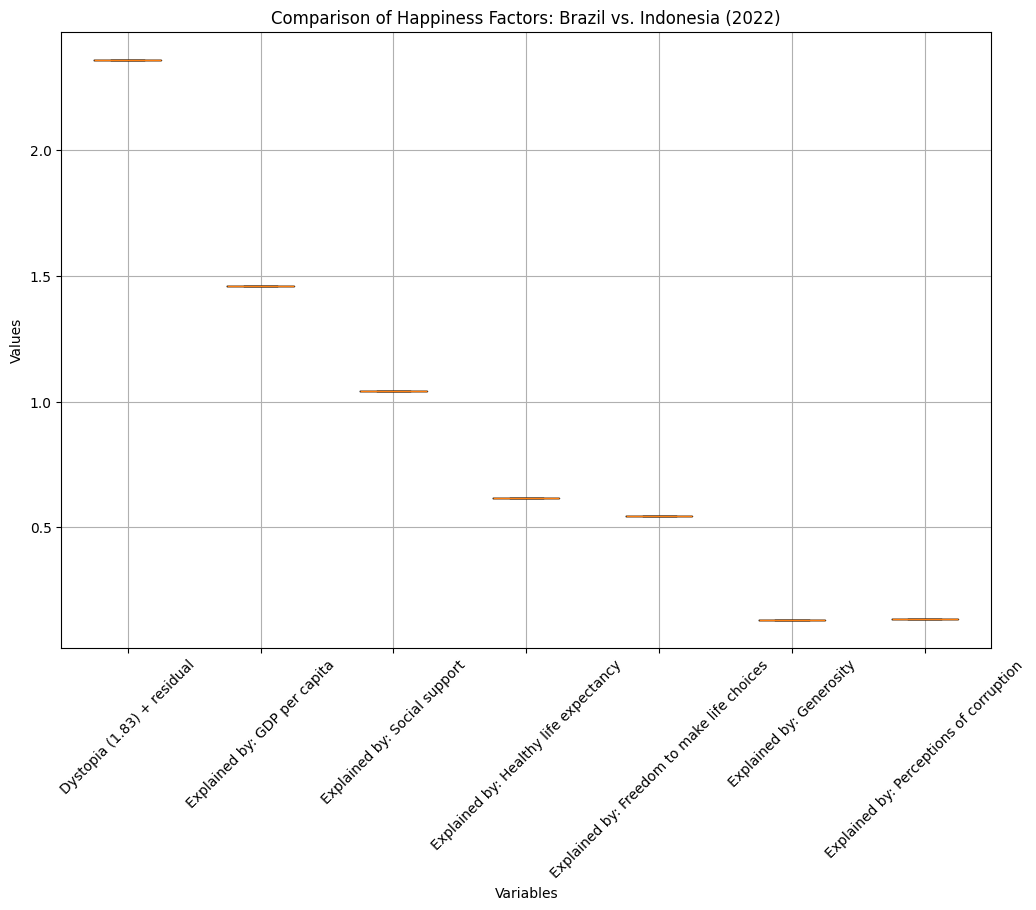

In [422]:
# Variabel-variabel untuk box plot
variables = ['Dystopia (1.83) + residual', 'Explained by: GDP per capita',
             'Explained by: Social support', 'Explained by: Healthy life expectancy',
             'Explained by: Freedom to make life choices',
             'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Filter data untuk Brazil dan Indonesia
countries = ['Brazil', 'Indonesia']
df_plot = df_2022[df_2022['Country'].isin(countries)]

# Buat box plot untuk setiap variabel
plt.figure(figsize=(12, 8))
plt.boxplot([df_plot[df_plot['Country'] == 'Brazil'][var] for var in variables],
            labels=variables)

# Tambahkan label sumbu x dan y, serta judul
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Comparison of Happiness Factors: Brazil vs. Indonesia (2022)')

# Tampilkan grid
plt.grid(True)

# Tampilkan plot
plt.xticks(rotation=45)
plt.show()

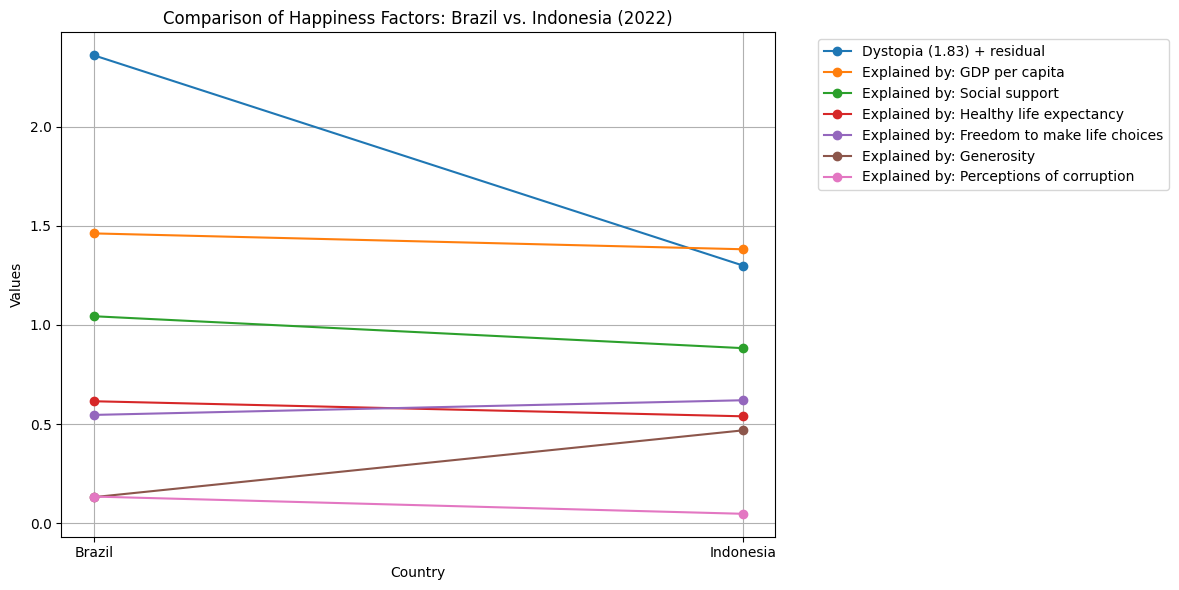

In [423]:
# Filter data untuk Brazil dan Indonesia
countries = ['Brazil', 'Indonesia']
df_plot = df_2022[df_2022['Country'].isin(countries)]

# Variabel-variabel untuk plot garis
variables = ['Dystopia (1.83) + residual', 'Explained by: GDP per capita',
             'Explained by: Social support', 'Explained by: Healthy life expectancy',
             'Explained by: Freedom to make life choices',
             'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Buat plot garis
plt.figure(figsize=(12, 6))
for var in variables:
    plt.plot(df_plot['Country'], df_plot[var], marker='o', label=var)

# Tambahkan label sumbu x dan y, serta judul
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Comparison of Happiness Factors: Brazil vs. Indonesia (2022)')

# Tampilkan grid
plt.grid(True)

# Tampilkan legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot
plt.tight_layout()
plt.show()